In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

%matplotlib inline

C:\Users\knnar\Anaconda3\envs\zestimate\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('train_2016_v2.csv/train_2016_v2.csv', parse_dates=["transactiondate"])
prop = pd.read_csv('properties_2016.csv/properties_2016.csv')

C:\Users\knnar\Anaconda3\envs\zestimate\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_df = pd.merge(train, prop, how='left', on='parcelid')

In [4]:
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15

In [6]:
train_df.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.027500e+04,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,...,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04
mean,1.298466e+07,0.011457,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,...,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13
std,2.504510e+06,0.161079,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,...,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,...,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13
25%,1.155950e+07,-0.025300,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,...,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13
50%,1.254734e+07,0.006000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,...,159.000000,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13
75%,1.422755e+07,0.039200,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,3.000000,...,361.000000,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13
max,1.629608e+08,4.737000,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,...,1366.000000,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13


In [7]:
train_df.columns[train_df.isnull().any()]

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'hashottuborspa', 'heatingorsystemtypeid',
       'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10',
       'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode',
       'propertyzoningdesc', 'regionidcity', 'regionidneighborhood',
       'regionidzip', 'storytypeid', 'threequarterbathnbr',
       'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'fireplaceflag',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount',

In [8]:
null = train_df.isnull().sum()/len(train)
null = null[null > 0]
null.sort_values(inplace=True)
null

landtaxvaluedollarcnt           0.000011
taxvaluedollarcnt               0.000011
propertycountylandusecode       0.000011
taxamount                       0.000066
regionidzip                     0.000388
structuretaxvaluedollarcnt      0.004209
censustractandblock             0.006702
calculatedfinishedsquarefeet    0.007322
yearbuilt                       0.008374
calculatedbathnbr               0.013093
fullbathcnt                     0.013093
regionidcity                    0.019972
finishedsquarefeet12            0.051831
lotsizesquarefeet               0.112434
unitcnt                         0.353608
propertyzoningdesc              0.354052
buildingqualitytypeid           0.364564
heatingorsystemtypeid           0.378787
regionidneighborhood            0.601086
garagecarcnt                    0.668380
garagetotalsqft                 0.668380
airconditioningtypeid           0.681185
numberofstories                 0.772141
poolcnt                         0.801706
pooltypeid7     

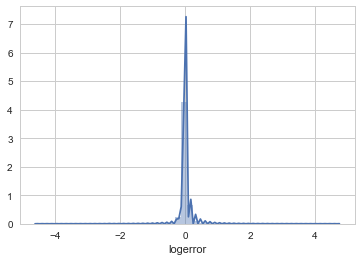

In [9]:
sns.distplot(train_df['logerror'])

In [10]:
print("Skewness of logerror is {}".format(train_df['logerror'].skew()))

Skewness of logerror is 2.1688282902579354


In [11]:
train_df['transaction_month'] = train_df.transactiondate.dt.month.astype(np.int64)
train_df['transaction_day'] = train_df.transactiondate.dt.weekday.astype(np.int64)

train_df = train_df.drop('transactiondate', 1)

In [12]:
train_df.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,transaction_month,transaction_day
count,9.027500e+04,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,...,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04,90275.000000,90275.000000
mean,1.298466e+07,0.011457,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,...,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13,5.849848,2.336693
std,2.504510e+06,0.161079,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,...,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11,2.812690,1.433257
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,...,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13,1.000000,0.000000
25%,1.155950e+07,-0.025300,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,...,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13,4.000000,1.000000
50%,1.254734e+07,0.006000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,...,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13,6.000000,2.000000
75%,1.422755e+07,0.039200,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,3.000000,...,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13,8.000000,4.000000
max,1.629608e+08,4.737000,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,...,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13,12.000000,6.000000


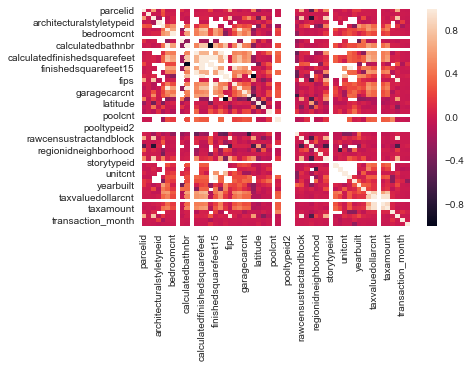

In [13]:
corr = train_df.corr()
sns.heatmap(corr)

In [14]:
corr['logerror'].sort_values(ascending=False)

logerror                        1.000000
basementsqft                    0.253395
yardbuildingsqft26              0.086179
finishedsquarefeet12            0.041922
calculatedfinishedsquarefeet    0.038784
finishedsquarefeet6             0.036847
finishedsquarefeet13            0.034715
threequarterbathnbr             0.034069
fireplacecnt                    0.033235
calculatedbathnbr               0.029448
fullbathcnt                     0.028845
bathroomcnt                     0.027889
garagecarcnt                    0.026531
finishedfloor1squarefeet        0.026242
bedroomcnt                      0.025467
garagetotalsqft                 0.023888
finishedsquarefeet50            0.023619
structuretaxvaluedollarcnt      0.022085
finishedsquarefeet15            0.019327
yearbuilt                       0.017312
numberofstories                 0.013075
censustractandblock             0.008892
rawcensustractandblock          0.008376
fips                            0.008363
taxvaluedollarcn

C:\Users\knnar\Anaconda3\envs\zestimate\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\knnar\Anaconda3\envs\zestimate\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


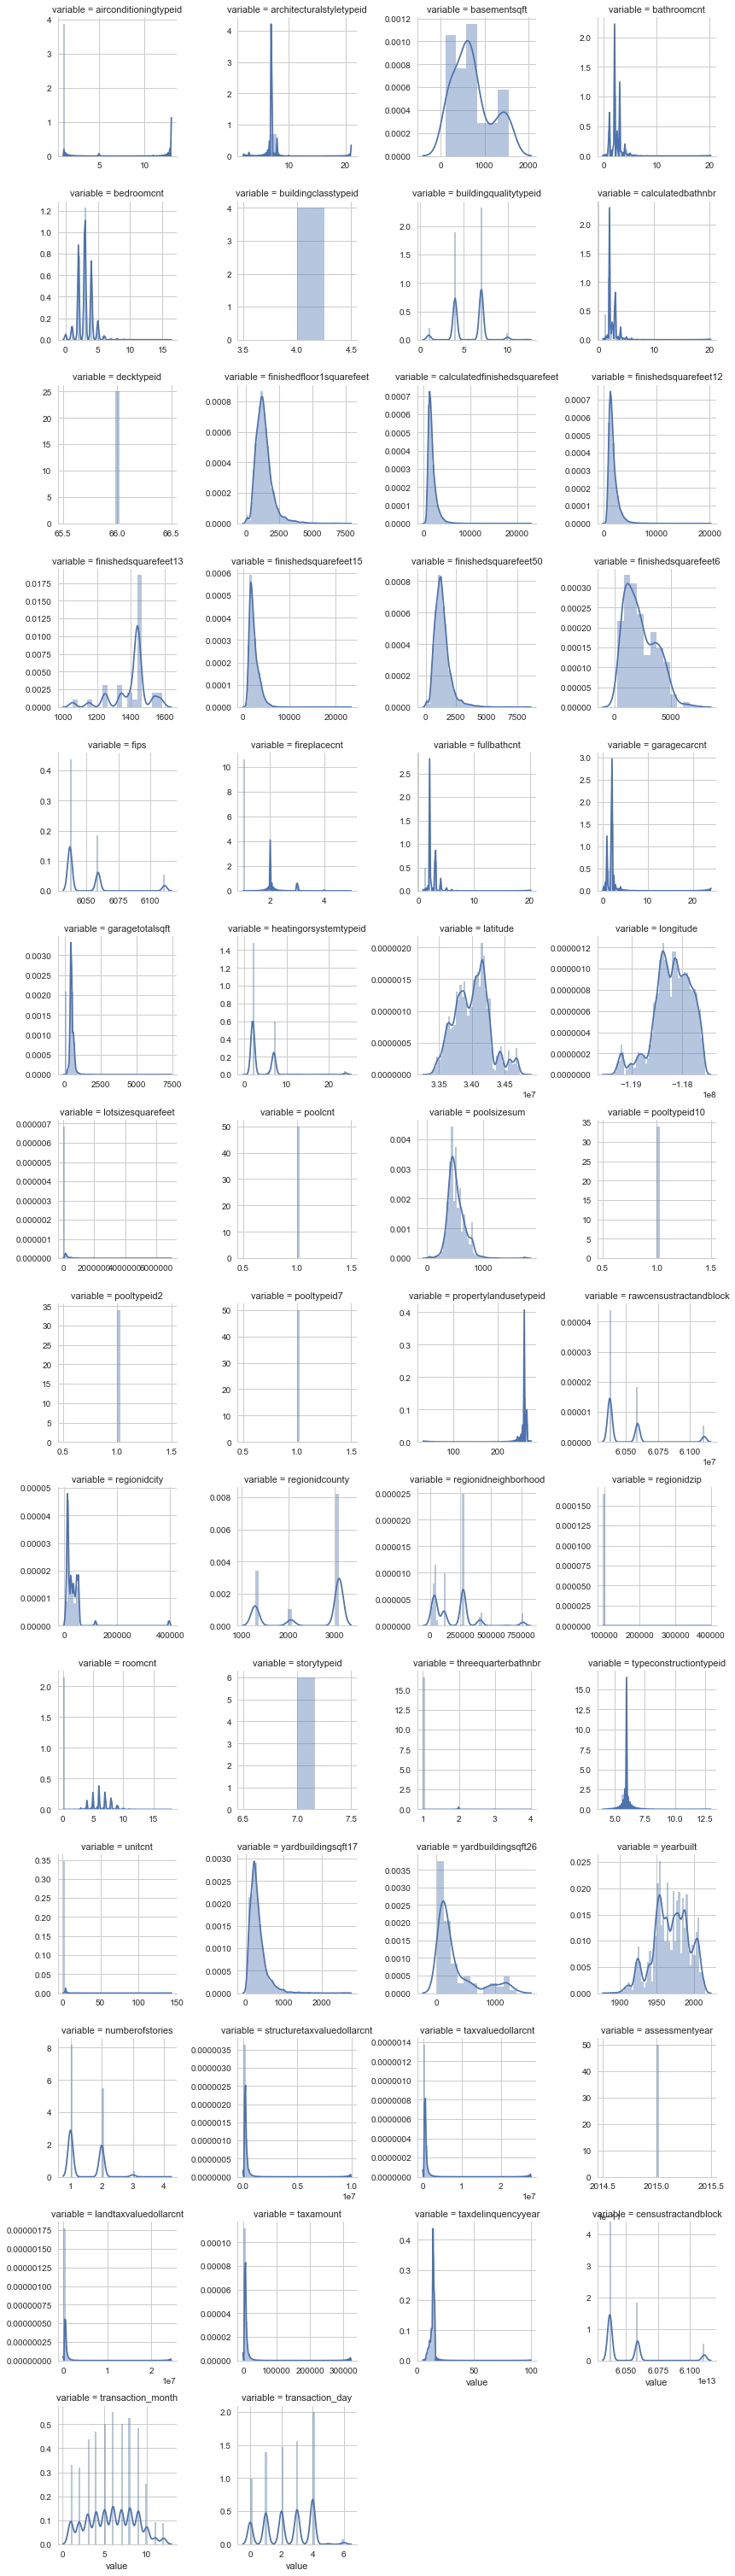

In [15]:
num_plot = [feature for feature in train_df.columns if train_df.dtypes[feature] != 'object']
num_plot.remove('parcelid')
num_plot.remove('logerror')
num_dim = pd.melt(train_df, value_vars=num_plot)
num_plot = sns.FacetGrid(num_dim, col='variable', col_wrap=4, sharex=False, sharey=False)
num_plot = num_plot.map(sns.distplot, 'value')
num_plot

In [16]:
from sklearn.preprocessing import LabelEncoder

for col in train_df.columns:
    train_df[col] = train_df[col].fillna(-1)
    if train_df[col].dtype == 'object':
        labelEncoder = LabelEncoder()
        labelEncoder.fit(list(train_df[col].values))
        train_df[col] = labelEncoder.transform(list(train_df[col].values))

X = train_df.drop(['parcelid', 'logerror'], axis=1)
y = train_df['logerror'].values

NameError: name 'validVariables' is not defined

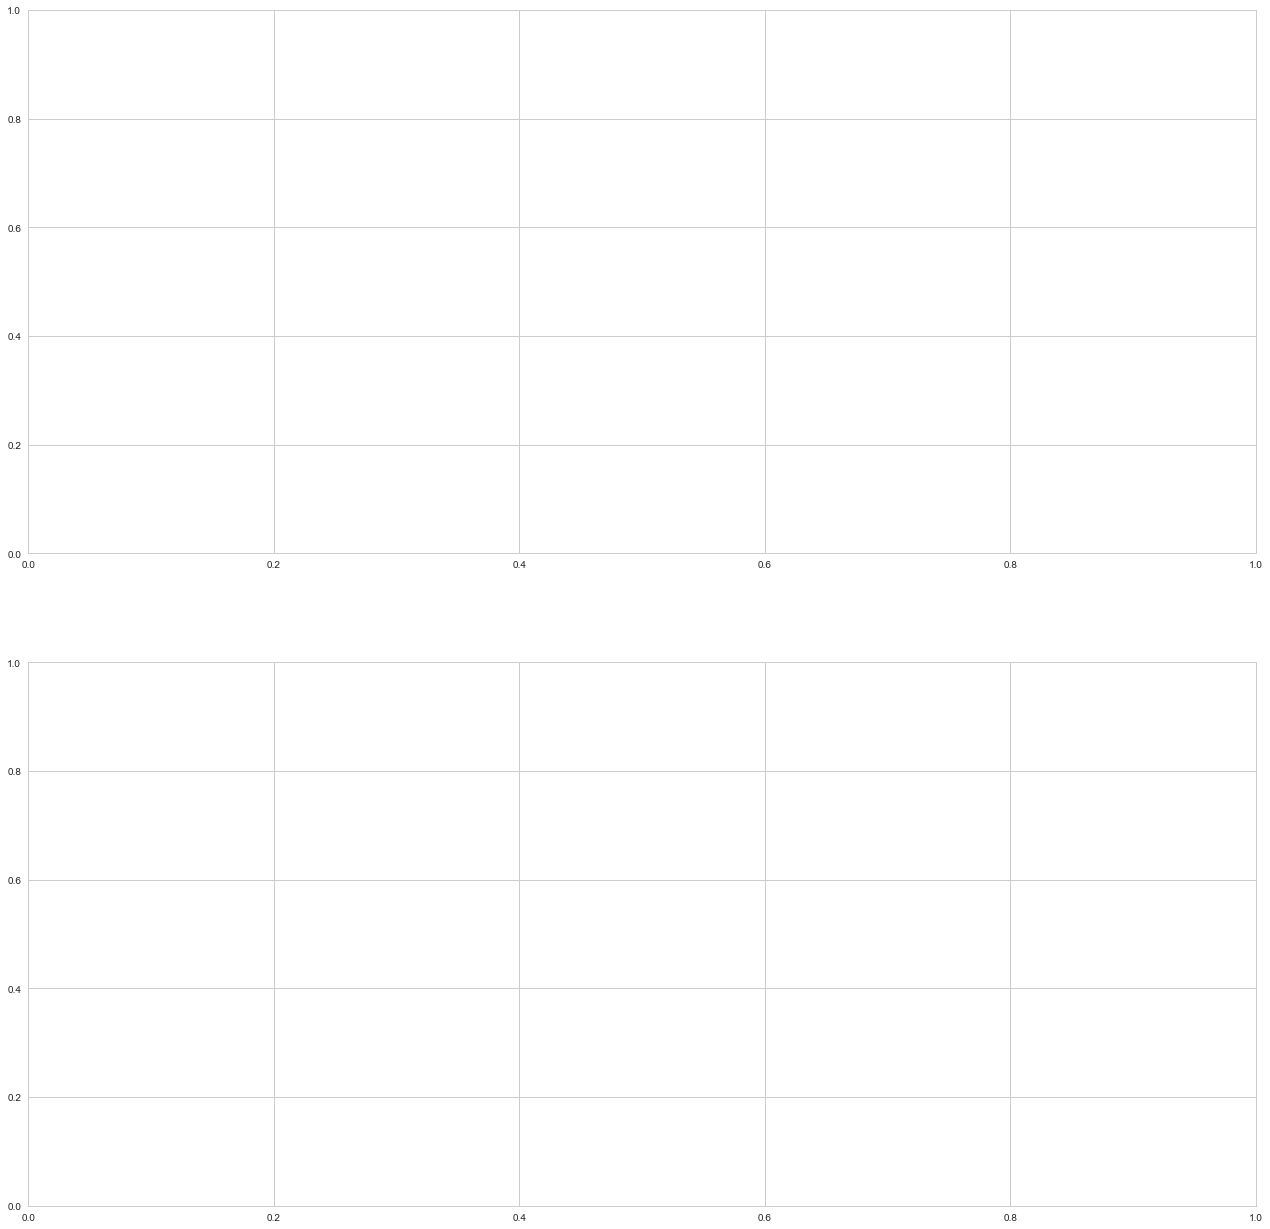

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

def calculate_vif(X):
    variables = list(train_df.columns)
    vif = {variable:variance_inflation_factor(exog=train_df.values, exog_idx=ix) for ix,variable in enumerate(list(train_df.columns))}
    return vif

variables = []
for feature in train_df.columns:
    if train_df[feature].dtype!='object' and feature not in ["parcelid", "logerror"]:
        variables.append(feature)
        
variables = train_df[variables].fillna(-999)
vifDict = calculate_vif(variables)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
variablesWithoutMC = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(22,22)
sns.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sns.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dTrain = xgb.DMatrix(X_train, y_train)
dTest = xgb.DMatrix(X_test, y_test)

params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [ ]:
print('Shape train: {}\nShape test: {}'.format(X.shape, y.shape))

In [ ]:
watchlist = [(dTrain, 'train'), (dTest, 'test')]
regr = xgb.train(dict(params, silent=1), dTrain, num_boost_round=200, evals=watchlist, early_stopping_rounds=50)

In [ ]:
featureImportance = regr.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sns.barplot(data=features, x="importance", y="features", orient="h")

In [ ]:
xTest = train_df.drop(['parcelid', 'logerror'], axis=1)
dTest = xgb.DMatrix(xTest)
predict = regr.predict(dTest)

In [ ]:
print(pd.DataFrame(predict).head())

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, predict)
print("MAE for xgboost is: ", mae)